## US population dataset
Población mensual de E.U. estimada en miles de personas, desde Enero 2011 a Diciembre 2018 (96 datos, 8 años).
veremos una forma diferente de obtener modelos AR

In [18]:
import pandas as pd
import numpy as np
%matplotlib inline

In [19]:
# Load the U.S. Population dataset
df = pd.read_csv('./uspopulation.csv',index_col='DATE',parse_dates=True)
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


In [20]:
df.index.freq = 'MS'

In [21]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


## Gráfico de la serie

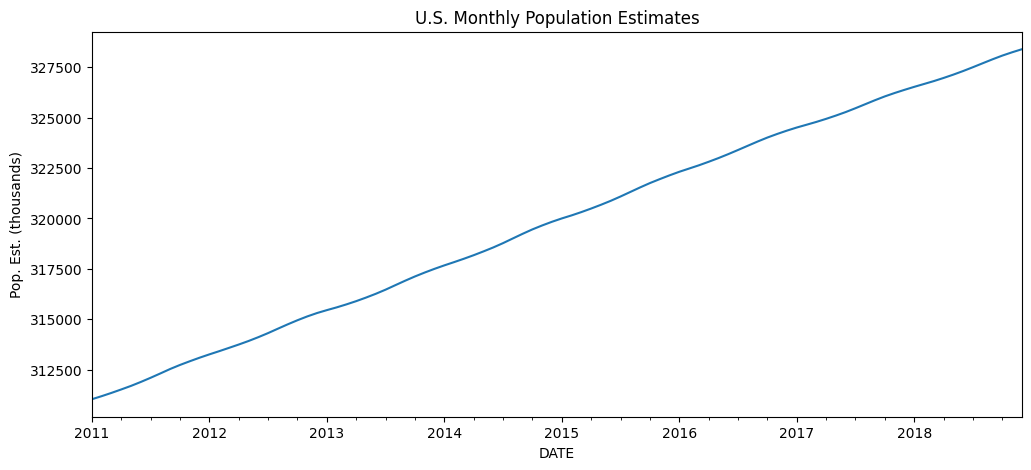

In [22]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(ylabel=ylabel); # eje Y

## Datos entrenamiento/prueba


In [23]:
len(df) # longitud del data set

96

In [24]:
train = df.iloc[:84]
test = df.iloc[84:]

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2011-01-01 to 2017-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PopEst  84 non-null     int64
dtypes: int64(1)
memory usage: 1.3 KB


In [26]:
train

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2017-08-01,325667
2017-09-01,325866
2017-10-01,326054


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2018-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PopEst  12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [28]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


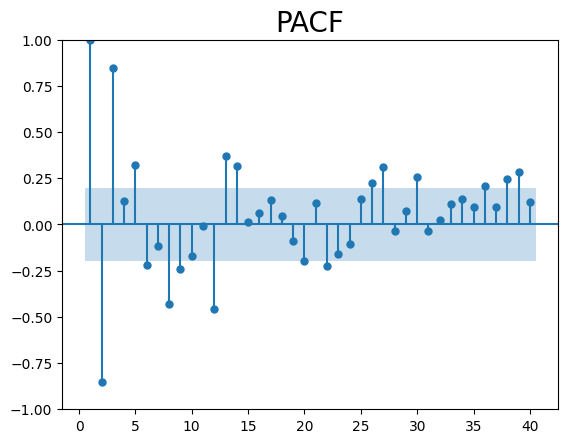

In [29]:
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
# de toda la data
sgt.plot_pacf(df.PopEst, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF", size = 20)
plt.show()

## Modelo AR(1)
probando uno en uno

In [30]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [31]:
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
model = sm.tsa.AutoReg(train, 1).fit() # 1 lags
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                     AutoReg(1)   Log Likelihood                -380.819
Method:               Conditional MLE   S.D. of innovations             23.789
Date:                Thu, 31 Aug 2023   AIC                            767.638
Time:                        21:56:47   BIC                            774.894
Sample:                    02-01-2011   HQIC                           770.553
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        284.9138    185.428      1.537      0.124     -78.518     648.346
PopEst.L1      0.9997      0.001   1718.076      0.000       0.999       1.001
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           +0.0000j            1.0003            0.0000
-----------------------------------------------------------------------------
"""

Busque el mejor modelo... para muestra se trabajara con AR(1)

Devuelve los retrasos = 1, los coeficientes.

In [32]:
# haciendo predicciones con data test
y_pred = model.predict(start=test.index.min(), end=test.index.max())
# or
# y_pred = model.predict(start=100, end=1000)

In [33]:
y_pred

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [34]:
# Comparando predicciones con valores reales
for i in range(len(y_pred)):
    print(f"predicted={y_pred[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326560.4034, expected=326527
predicted=326742.7495, expected=326669
predicted=326925.0383, expected=326812
predicted=327107.2698, expected=326968
predicted=327289.4442, expected=327134
predicted=327471.5613, expected=327312
predicted=327653.6212, expected=327502
predicted=327835.6239, expected=327698
predicted=328017.5695, expected=327893
predicted=328199.4579, expected=328077
predicted=328381.2892, expected=328241
predicted=328563.0633, expected=328393


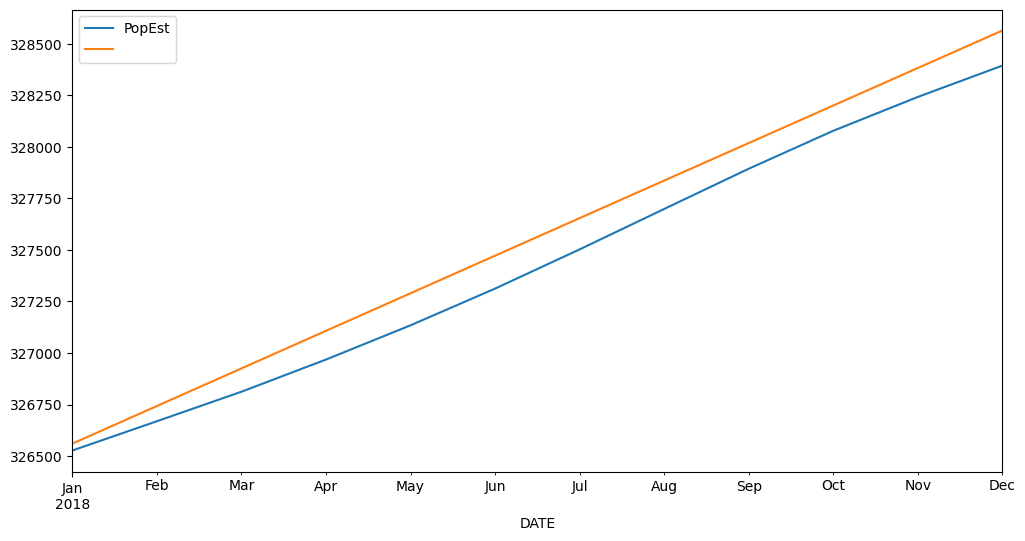

In [35]:
test['PopEst'].plot(legend=True)
y_pred.plot(legend=True,figsize=(12,6));

El modelo no estima bien los valores reales.

## Modelo AR(2)

In [36]:
# Recall that our model was already created above based on the training set
model2 = sm.tsa.AutoReg(train, 2).fit() # 2 lags
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 PopEst   No. Observations:                   84
Model:                     AutoReg(2)   Log Likelihood                -320.605
Method:               Conditional MLE   S.D. of innovations             12.072
Date:                Thu, 31 Aug 2023   AIC                            649.209
Time:                        21:56:47   BIC                            658.836
Sample:                    03-01-2011   HQIC                           653.075
                         - 12-01-2017                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.3683     96.729      1.420      0.156     -52.218     326.954
PopEst.L1      1.8535      0.056     33.016      0.000       1.743       1.964
PopEst.L2     -0.8538      0.056    -15.212      0.000      -0.964      -0.744
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0024           +0.0000j            1.0024            0.0000
AR.2            1.1684           +0.0000j            1.1684            0.0000
-----------------------------------------------------------------------------
"""

considera dos retrasos

In [37]:
# predicciones
y_pred2 = model2.predict(start=test.index.min(), end=test.index.max())
y_pred2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944949
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787331
2018-08-01    327665.826848
2018-09-01    327829.064481
2018-10-01    327992.414810
2018-11-01    328155.804860
2018-12-01    328319.172309
Freq: MS, dtype: float64

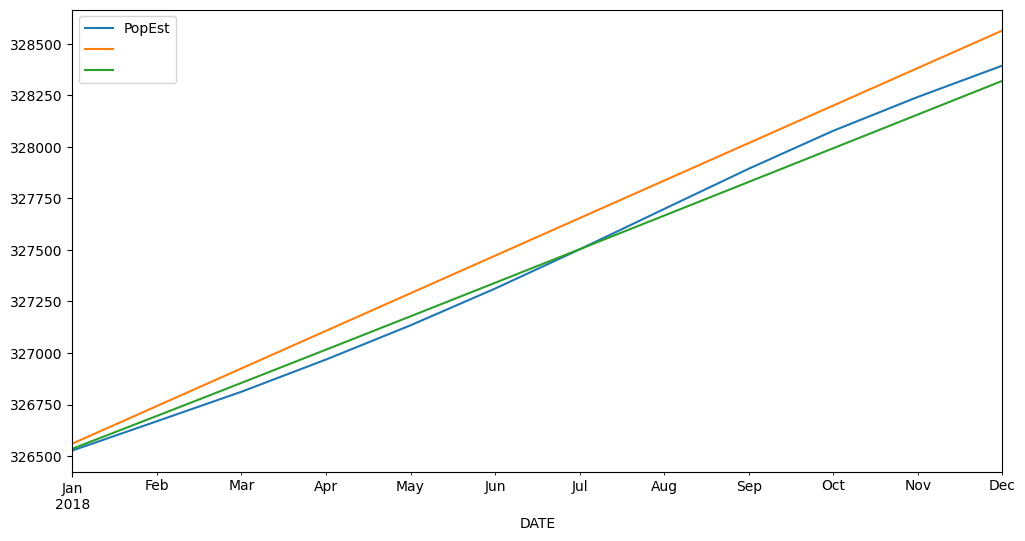

In [38]:
test['PopEst'].plot(legend=True)
y_pred.plot(legend=True)
y_pred2.plot(legend=True,figsize=(12,6));

In [39]:
from statsmodels.tsa.ar_model import AutoReg
model=AutoReg(train['PopEst'],lags=2)
ARFit=model.fit()
forecasted=ARFit.predict(start=len(df),end=len(df)+12)
forecasted

2019-01-01    328482.463950
2019-02-01    328645.634383
2019-03-01    328808.644882
2019-04-01    328971.462438
2019-05-01    329134.058935
2019-06-01    329296.410442
2019-07-01    329458.496610
2019-08-01    329620.300156
2019-09-01    329781.806421
2019-10-01    329943.002994
2019-11-01    330103.879381
2019-12-01    330264.426735
2020-01-01    330424.637616
Freq: MS, dtype: float64

<Axes: xlabel='DATE'>

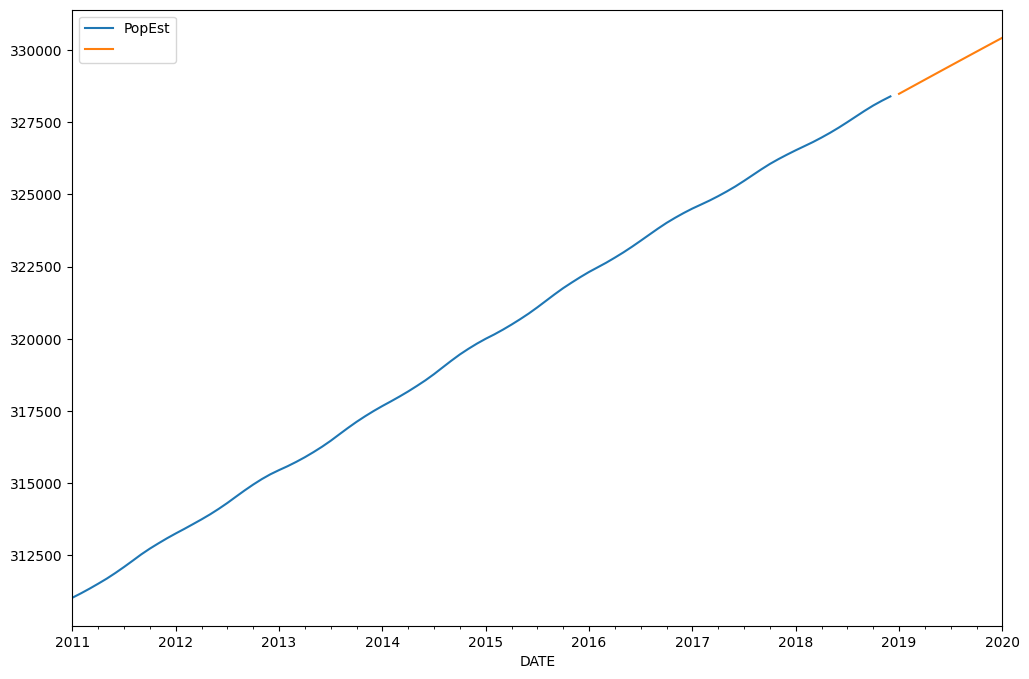

In [40]:
#visualizacion
df['PopEst'].plot(figsize=(12,8),legend=True)
forecasted.plot(legend=True)

Ha mejorado la estimacion.

## Modelo AR(p) donde statsmodels elige p
Criterios: bic, aic y otros


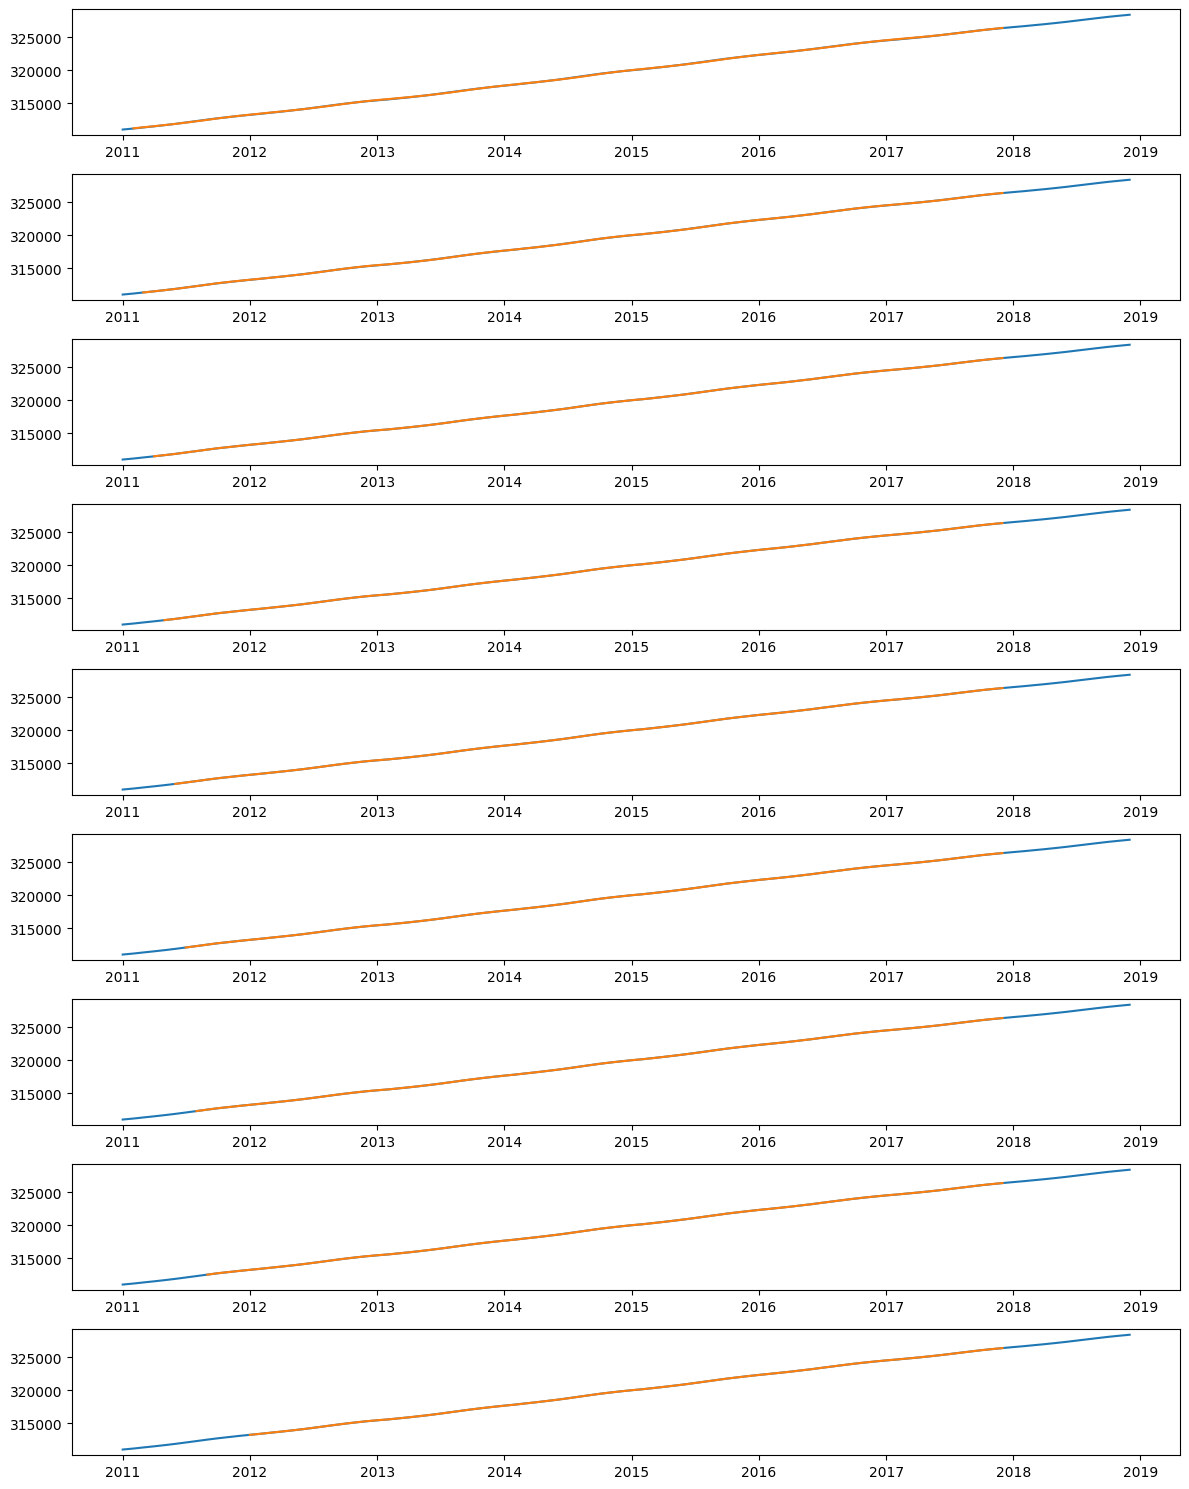

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,15))
ar_orders=[1,2,3,4,5,6,7,8,12]
fitted_model_dict={}
for idx, ar_order in enumerate (ar_orders):
  model = sm.tsa.AutoReg(train, ar_order)
  ar_model_fit=model.fit()
  fitted_model_dict[ar_order]=ar_model_fit
  plt.subplot(9,1,idx+1)
  plt.plot(df)
  plt.plot(ar_model_fit.fittedvalues)
plt.tight_layout()

In [42]:
for ar_order in ar_orders:
  print("AIC for AR(%s): %s" %(ar_order,fitted_model_dict[ar_order].aic))

AIC for AR(1): 767.6378091856507
AIC for AR(2): 649.209484877313
AIC for AR(3): 540.6410484040623
AIC for AR(4): 534.3891769156792
AIC for AR(5): 519.3382304243478
AIC for AR(6): 512.6869214559879
AIC for AR(7): 508.685865716744
AIC for AR(8): 488.3530527017233
AIC for AR(12): 441.07257969451416


considero 8 retornos, sus coeficientes

In [43]:
from statsmodels.tsa.ar_model import AutoReg
model8 = sm.tsa.AutoReg(train, 8).fit()
y_pred8 = model8.predict(start=test.index.min(), end=test.index.max())
y_pred8

2018-01-01    326523.865562
2018-02-01    326662.772580
2018-03-01    326805.746894
2018-04-01    326960.064241
2018-05-01    327130.572962
2018-06-01    327315.962814
2018-07-01    327511.010135
2018-08-01    327710.938399
2018-09-01    327907.425585
2018-10-01    328092.870819
2018-11-01    328264.133720
2018-12-01    328421.667277
Freq: MS, dtype: float64

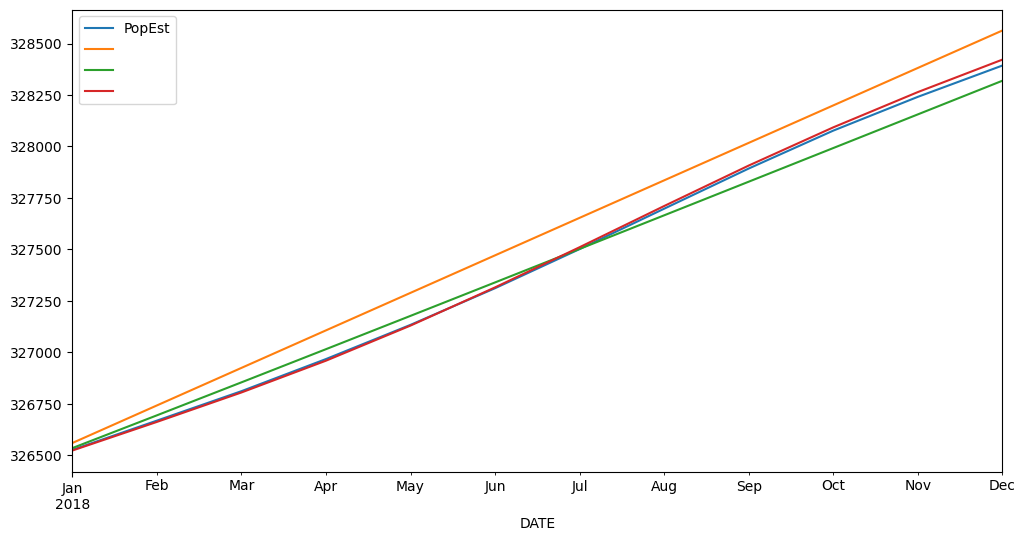

In [44]:
# Graficando
test['PopEst'].plot(legend=True)
y_pred.plot(legend=True)
y_pred2.plot(legend=True)
y_pred8.plot(legend=True,figsize=(12,6));

AR(8) sigue un comportamiento proximo a la data real.

## Evaluar el modelo
Error cuadrático medio: Mean Squared Error (MSE).

In [46]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(8)']
preds = [y_pred, y_pred2, y_pred8]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 17449.71424
AR(2) Error: 2713.258563
AR(8) Error: 186.9732037


Resultado: El MSE disminuye